### **NORMAL 1**

In [ ]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(69) #for reproducibility

In [ ]:
Nu = 50
Nb = 25
tau = 1
A = np.random.normal(0, 1, (Nb, Nu))

In [ ]:
print("A dimension:")
print(A.shape)

A dimension:
(25, 50)


In [ ]:
Q_temp = np.random.normal(0, 1, (Nu, Nu))
Q = np.dot(Q_temp.T, Q_temp) # Q is psd

print("Q dimension:")
print(Q.shape)

Q dimension:
(50, 50)


In [ ]:
q = np.random.normal(0, 1, Nu)
b = np.random.normal(0, 1, Nb)

print("q dimension:")
print(q.shape)
print("b dimension:")
print(b.shape)

q dimension:
(50,)
b dimension:
(25,)


In [ ]:
v_init = np.random.normal(0, 1, Nb)
lambd_init = np.random.rand(Nb)

print("v_init dimension:")
print(v_init.shape)
print("lambd_init dimension:")
print(lambd_init.shape)

v_init dimension:
(25,)
lambd_init dimension:
(25,)


In [ ]:
v = v_init
print("v dimesnion:")
print(v.shape)

lambd = lambd_init
print("lambd dimension:")
print(lambd.shape)

primal_res = []
dual_res = []
iters = np.arange(0,500)

minpNORMAL=150
minIterNORMAL=0

cached_inv = np.linalg.inv((Q + tau*np.matmul(A.T, A)))
print("cached inverse dimensions:")
print(cached_inv.shape)

v dimesnion:
(25,)
lambd dimension:
(25,)
cached inverse dimensions:
(50, 50)


In [ ]:
for k in iters:
    u = np.matmul(cached_inv, np.dot(A.T, lambd+tau*v) - q) # u-update
    v_prev = v
    v = np.minimum(np.dot(A, u) - (lambd/tau), b) # v-update
    lambd = lambd + tau*(v - np.dot(A, u)) # lambda-update

    primal_res.append(np.linalg.norm(v - np.dot(A, u), 2))
    dual_res.append(np.linalg.norm(-tau*np.matmul(A.T, v - v_prev), 2))
    if primal_res[k]<minpNORMAL:
      minpNORMAL=primal_res[k]
      minIterNORMAL=k

1.2381794635596447e-15
409


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

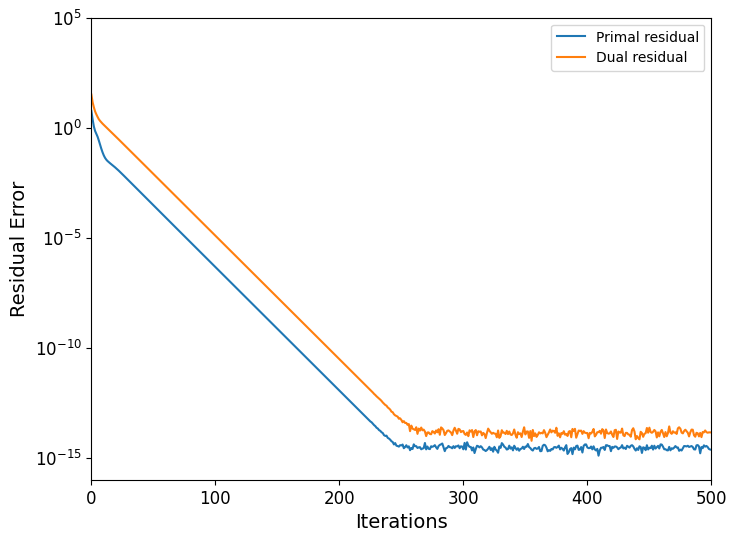

In [ ]:
from matplotlib.ticker import MaxNLocator

print(minpNORMAL)
print(minIterNORMAL)
plt.figure(figsize=(8,6))
plt.xlim(0,500)
plt.ylim(1e-16, 1e2)
manual_ticks = [1e-15, 1e-10, 1e-5, 1e0, 1e5]
plt.plot(primal_res, label="Primal residual")
plt.plot(dual_res, label="Dual residual")
plt.yscale("log")

plt.xlabel("Iterations", fontsize=14)
plt.ylabel("Residual Error", fontsize=14)

plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=6))

plt.yticks(manual_ticks)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend with a larger font size
plt.legend(fontsize=12)
plt.grid(visible=True, which='major', linestyle='--')

plt.xlabel("Iterations")
plt.ylabel("Residual Error")
plt.legend()
plt.grid(visible=True, which='major', linestyle='--')
plt.savefig("high_dpi_graph.png", dpi=300)
from google.colab import files
files.download("high_dpi_graph.png")
plt.grid()


### **SVD 1**

In [ ]:
6# Compute SVD of (Q + tau * A.T * A)
U, S, Vt = np.linalg.svd(Q + tau * np.matmul(A.T, A))
iters = np.arange(0, 500)


r2 = 2 # Adjust r based on desired trade-off between speed and accuracy
U_r2 = U[:, :r2]
S_r2=np.diag(1/S[:r2])
Vt_r2 = Vt[:r2, :]

r4 = 4 # Adjust r based on desired trade-off between speed and accuracy
U_r4 = U[:, :r4]
S_r4=np.diag(1/S[:r4])
Vt_r4 = Vt[:r4, :]

r8 = 8 # Adjust r based on desired trade-off between speed and accuracy
U_r8 = U[:, :r8]
S_r8=np.diag(1/S[:r8])
Vt_r8 = Vt[:r8, :]

r16 = 16 # Adjust r based on desired trade-off between speed and accuracy
U_r16 = U[:, :r16]
S_r16=np.diag(1/S[:r16])
Vt_r16 = Vt[:r16, :]

r32 = 32 # Adjust r based on desired trade-off between speed and accuracy
U_r32 = U[:, :r32]
S_r32=np.diag(1/S[:r32])
Vt_r32 = Vt[:r32, :]

r50 = 50 # Adjust r based on desired trade-off between speed and accuracy
U_r50 = U[:, :r50]
S_r50=np.diag(1/S[:r50])
Vt_r50 = Vt[:r50, :]

print("U_r shape:")
print(U_r2.shape)
print("S_r shape:")
print(S_r2.shape)
print("Vt_r shape:")
print(Vt_r2.shape)
print()

U_r shape:
(50, 2)
S_r shape:
(2, 2)
Vt_r shape:
(2, 50)



In [ ]:
primal_res_plot=[]
dual_res_plot=[]

In [ ]:
print(iters)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [ ]:
def matrix_operations(S_r, Vt_r,U_r):
  v = v_init
  lambd = lambd_init
  primal_res_svd = []
  dual_res_svd = []
  minpSVD=200
  minIterSVD=0

  for k in iters:
    t1=S_r@Vt_r
    t21=(lambd+tau*v)
    t2=(A.T@t21)-q
    temp1=np.dot(t1,t2)
    temp2=U_r@temp1
    u=temp2
    #u = np.matmul(cached_inv_approx, np.dot(A.T, lambd + tau * v) - q)  # u-update
    v_prev = v
    v = np.minimum(np.dot(A, u) - (lambd / tau), b)  # v-update
    lambd = lambd + tau * (v - np.dot(A, u))  # lambda-update

    primal_res_svd.append(np.linalg.norm(v - np.dot(A, u), 2))
    dual_res_svd.append(np.linalg.norm(-tau * np.matmul(A.T, v - v_prev), 2))
    if primal_res_svd[k]<minpSVD:
      minpSVD=primal_res_svd[k]
      minIterSVD=k


  print(minpSVD)
  print(minIterSVD)

  primal_res_plot = primal_res_svd  # Replace with actual data, should have 500 elements
  dual_res_plot = dual_res_svd

  print(primal_res_svd[1])
  plt.figure(figsize=(8,6))
  plt.xlim(0,500)
  plt.ylim(1e-16, 1e2)
  plt.plot(primal_res_svd, label="Primal residual")
  plt.plot(dual_res_svd, label="Dual residual")
  plt.yscale("log")

  manual_ticks = [1e-15, 1e-10, 1e-5, 1e0, 1e5]
  plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=6))
  plt.yticks(manual_ticks)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.legend(fontsize=12)
  plt.grid(visible=True, which='major', linestyle='--')

  plt.xlabel("Iterations")
  plt.ylabel("Residual Error")
  plt.savefig("high_dpi_graph.png", dpi=300)
  files.download("high_dpi_graph.png")
  plt.legend()
  plt.grid()
  return

# r=2

3.742013449483829
102
3.861407346360532


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

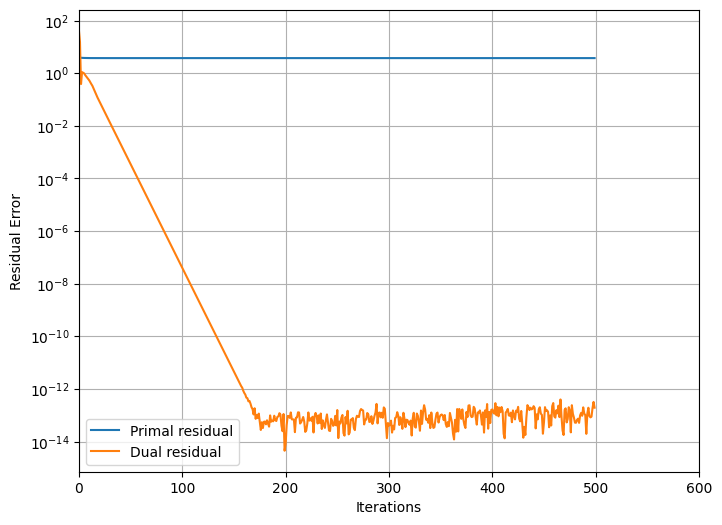

In [ ]:
matrix_operations(S_r2, Vt_r2,U_r2)

# r=4

3.529696100707325
265
3.7963055596298916


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

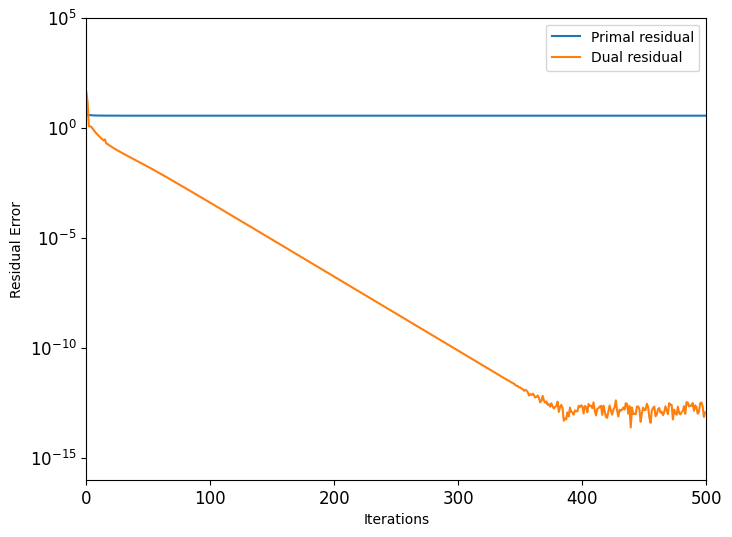

In [ ]:
matrix_operations(S_r4, Vt_r4,U_r4)
print()

# r=8

2.8133121284170124
499
3.786953206010051


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

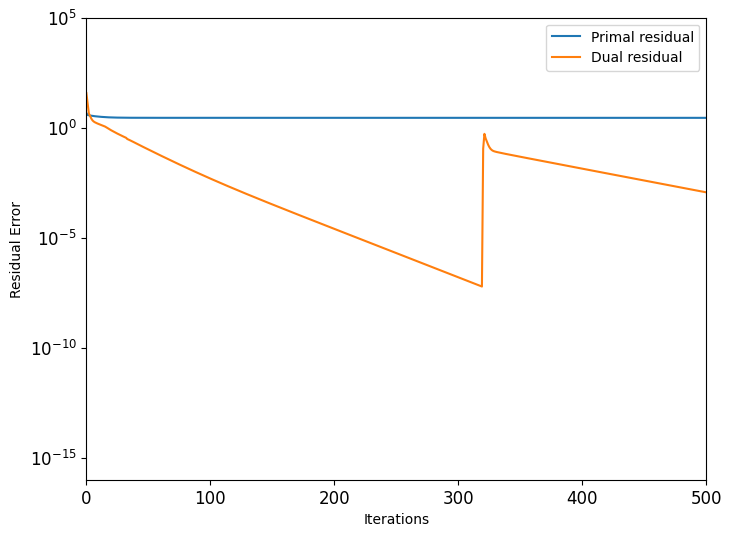

In [ ]:
matrix_operations(S_r8, Vt_r8,U_r8)

# r=16

0.00322382667742924
499
3.154724411267042


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

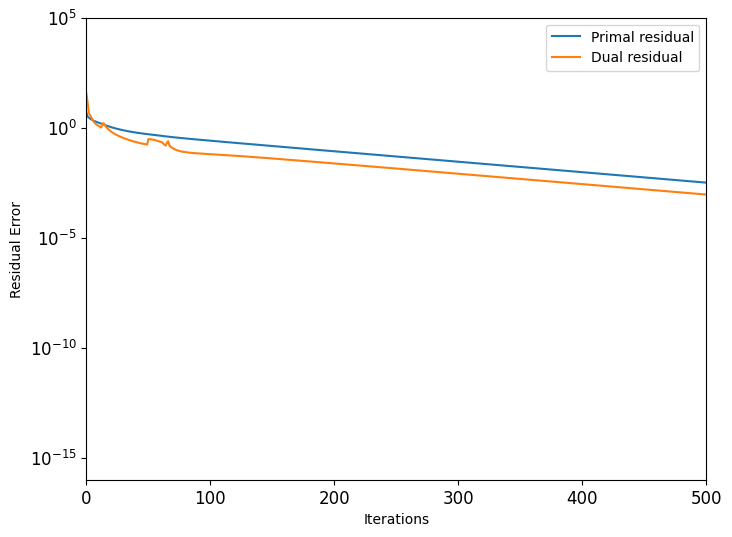

In [ ]:
matrix_operations(S_r16, Vt_r16,U_r16)

# r=32

7.219451441763396e-16
415
2.302629600073827


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

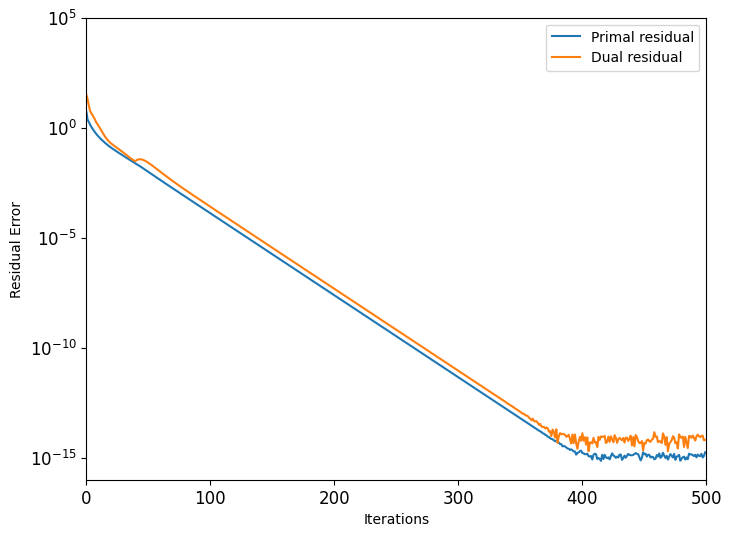

In [ ]:
matrix_operations(S_r32, Vt_r32,U_r32)

# **r=50**

9.516409029142706e-16
434
2.401530967128419


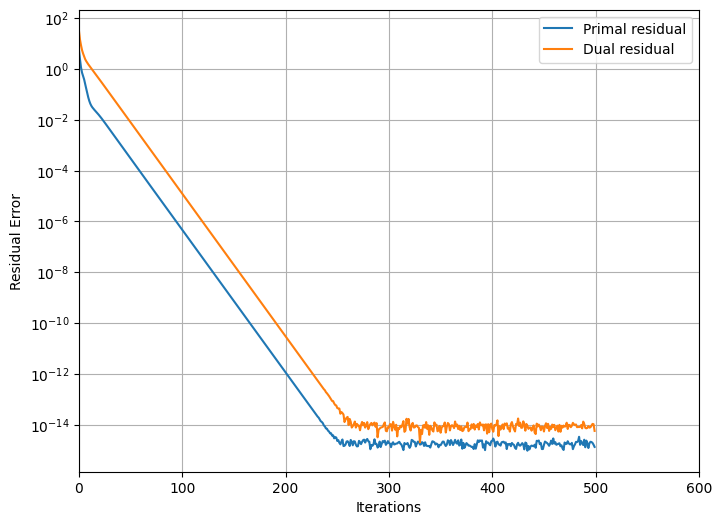

In [ ]:
matrix_operations(S_r50, Vt_r50,U_r50)

In [ ]:
diff=cached_inv-(S_r50@Vt_r50@U_r50)
print(diff)

[[ 0.04155032  0.01276026 -0.01605904 ... -0.00485173  0.01208364
  -0.00126783]
 [ 0.01276026  0.03085739 -0.014916   ... -0.00495702  0.00804903
   0.00839417]
 [-0.01605904 -0.014916    0.05308989 ...  0.01677169 -0.01910441
  -0.02142875]
 ...
 [-0.00485173 -0.00495702  0.01677169 ... -0.13581867 -0.01549269
  -0.00500656]
 [ 0.01208364  0.00804903 -0.01910441 ... -0.01549269 -0.1628878
   0.00478517]
 [-0.00126783  0.00839417 -0.02142875 ... -0.00500656  0.00478517
  -0.30913812]]
